
> **ISO2024 INTRODUCTORY SPATIAL 'OMICS ANALYSIS**
>
>
>- HYBRID : TORONTO & ZOOM
>- 9TH JULY 2024 <br>


>**Module 4 PRE-WORK - Supplementary file 1 <br>
>**Instructor : Shamini Ayyadhury**

---

```
Supplementary script 03 :
```
We will prepare a cropped image, subsetted transcript file 

In [1]:
### import the following libraries
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
#from PIL import Image
import os
import warnings
import tifffile as tiff

warnings.filterwarnings('ignore')

In [2]:
### directory & filepaths
data_dir = '/home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/'


In [3]:
transcripts = 'transcripts.parquet'
image = 'morphology_focus_0000.ome.tif'

In [4]:
df_transcript = pd.read_parquet(data_dir+'out/'+transcripts)
iF = tiff.imread(data_dir+'out/morphology_focus/'+image)


<tifffile.TiffFile 'morphology_focus_0000.ome.tif'> OME series cannot read multi-file pyramids


In [5]:
scale = 0.2125

First convert um to pixels using the scale factor

In [6]:
df_transcript[['x_location']] = df_transcript[['x_location']]/scale
df_transcript[['y_location']] = df_transcript[['y_location']]/scale

In [7]:
df_transcript

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
0,281552286122001,UNASSIGNED,0,LAMP2,930.994568,34034.878906,13.002087,23.423641,AB1,572.016052,227
1,281552286123841,UNASSIGNED,0,S100B,763.107239,34041.429688,12.732937,40.000000,AB1,607.579163,325
2,281552286130773,UNASSIGNED,0,SOX9,974.756165,34019.156250,12.822845,40.000000,AB1,562.365417,29
3,281552286134045,UNASSIGNED,0,CDK6,54.168255,34064.957031,12.638298,40.000000,AB1,757.802856,126
4,281552286134096,UNASSIGNED,0,TUBA1B,942.323242,33987.441406,12.715304,14.935614,AB1,568.401428,185
...,...,...,...,...,...,...,...,...,...,...,...
178716164,281895883985529,UNASSIGNED,0,FGF2,53012.632812,50830.421875,24.215897,38.830399,AF19,186.354004,248
178716165,281895883985883,UNASSIGNED,0,AHSP,53102.347656,50837.386719,19.797306,32.770226,AF19,175.709915,477
178716166,281895883987092,UNASSIGNED,0,PRG4,53357.175781,50795.656250,19.894650,40.000000,AF19,139.141449,484
178716167,281895883988908,UNASSIGNED,0,KMT2C,53657.011719,50609.363281,20.007725,40.000000,AF19,73.713997,96


Crop and subset

In [8]:
xmin_cut = int(10000/scale)
xmax_cut = int(11000/scale)

ymin_cut = int(6000/scale)
ymax_cut = int(7000/scale)

print(xmin_cut, xmax_cut, ymin_cut, ymax_cut)

47058 51764 28235 32941


In [9]:
transcripts_subset = df_transcript[((df_transcript['x_location'] > xmin_cut) & (df_transcript['x_location'] < xmax_cut)) & ((df_transcript['y_location'] > ymin_cut) & (df_transcript['y_location'] < ymax_cut))]

<Axes: xlabel='x_location', ylabel='y_location'>

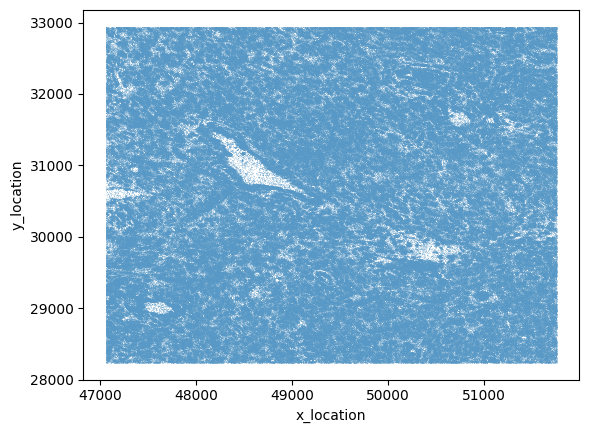

In [10]:
sns.scatterplot(data=transcripts_subset, x='x_location', y='y_location', s=.1)

In [11]:
### has ot be an integer as images are not on a continous scale transcript coordinates are

min_x = int(transcripts_subset['x_location'].min())
max_x = int(transcripts_subset['x_location'].max())

min_y = int(transcripts_subset['y_location'].min())
max_y = int(transcripts_subset['y_location'].max())

In [12]:
print(min_x, max_x, min_y, max_y)

47058 51763 28235 32940


reset the coordinates to ensure it matches with the cropped image

In [13]:
### reset the coordinates to 0
transcripts_subset['x_location'] = transcripts_subset['x_location'] - min_x
transcripts_subset['y_location'] = transcripts_subset['y_location'] - min_y

### this file will be used subsquently for baysor segmentationa and seg free analysis
transcripts_subset.to_csv(data_dir+'module4/transcripts_subset_all_genes.csv')

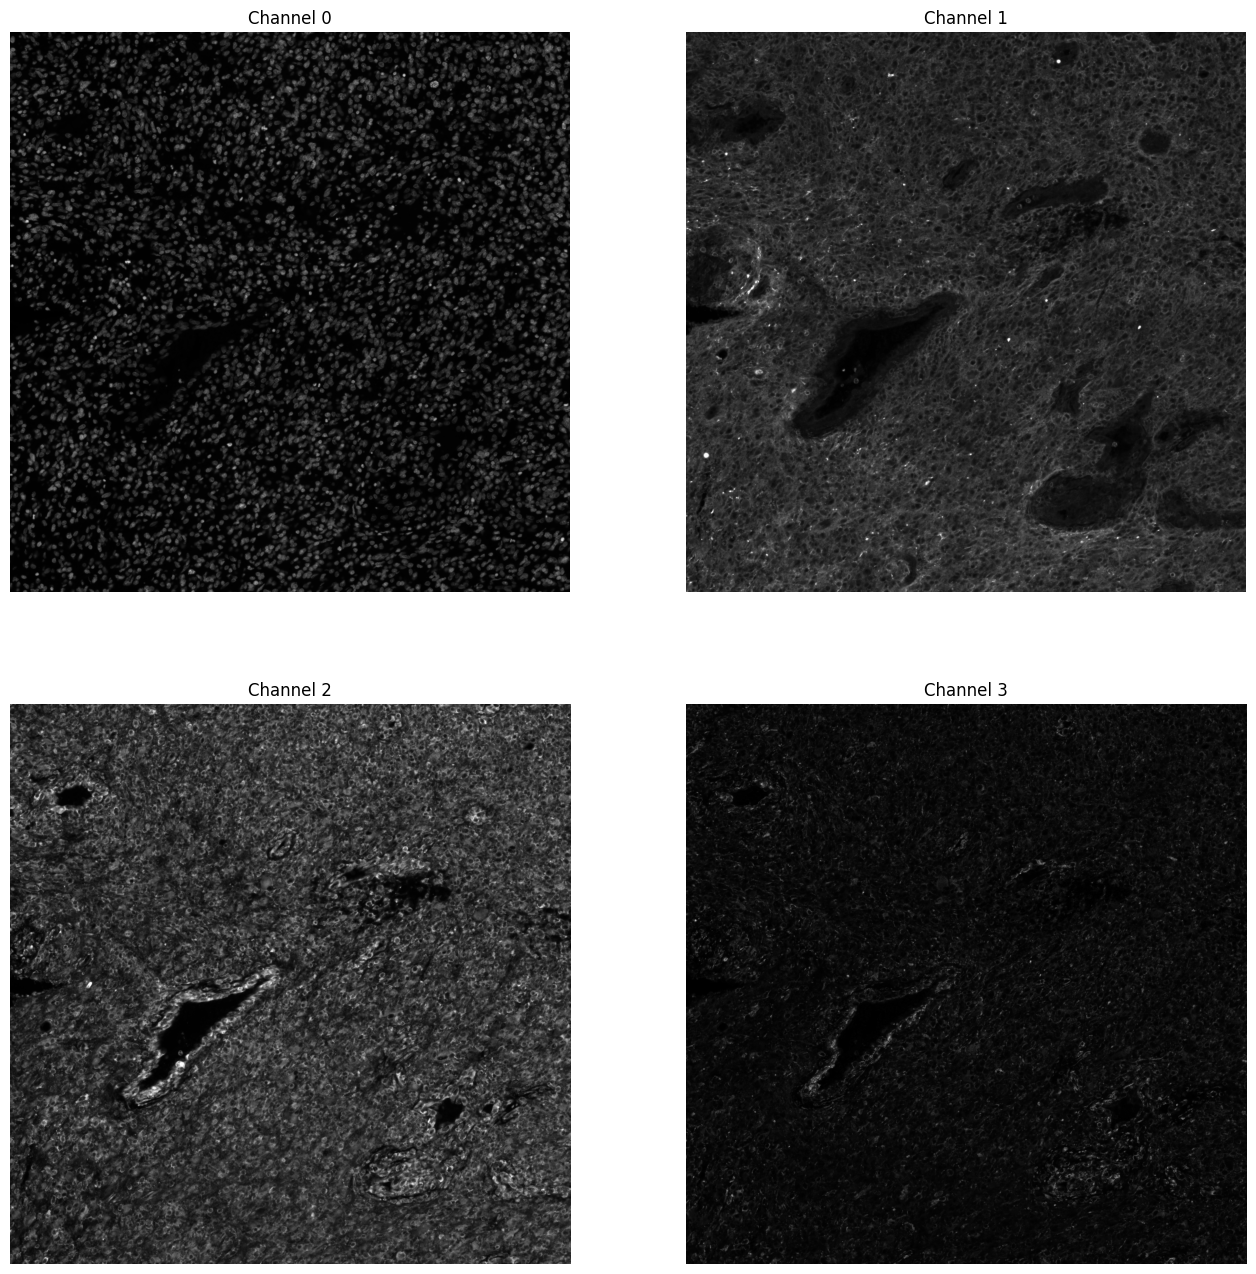

In [14]:
### crop the image
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
iF_crop = iF[:, min_y:max_y, min_x:max_x]
ax = ax.flatten()

for channel in range(4):
    ax[channel].imshow(iF_crop[channel], cmap='gray')
    ax[channel].axis('off')
    ax[channel].set_title(f'Channel {channel}') 

In [15]:
### save the cropped image
tiff.imsave(data_dir+'module4/cropped_image_fluo.tif', iF_crop)

(3000.0, 3500.0)

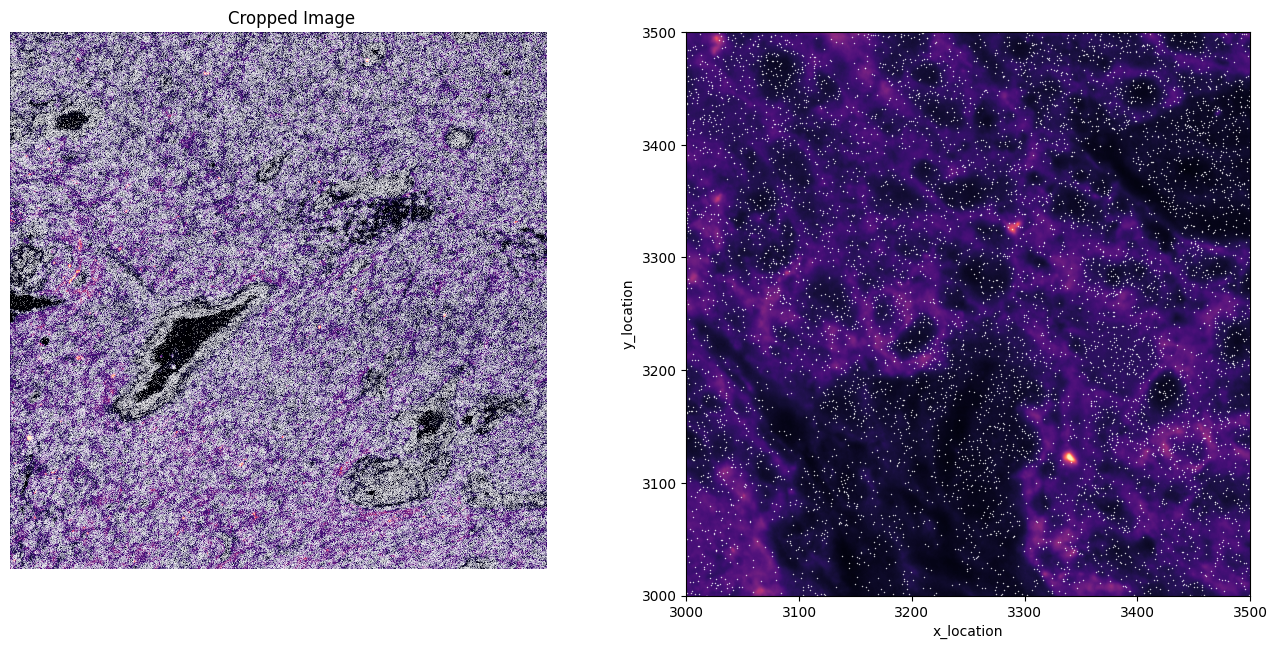

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
transcripts_subset_sample = transcripts_subset.sample(frac=0.3, random_state=1)

axes[0].imshow(iF_crop[1,:,:], cmap='magma')
ax = sns.scatterplot(data=transcripts_subset_sample, x='x_location', y='y_location', s=0.3, ax=axes[0], alpha=0.5, color='white')
axes[0].set_title('Cropped Image')
axes[0].axis('off')

axes[1].imshow(iF_crop[1,:,:], cmap='magma')
ax = sns.scatterplot(data=transcripts_subset_sample, x='x_location', y='y_location', s=0.9, ax=axes[1], alpha=0.75, color='white')
ax.set_xlim(3000, 3500)
ax.set_ylim(3000, 3500)

In [18]:
### import cell boundaries and nuclear boundaries files
cell_boundaries = pd.read_parquet(data_dir+'out/cell_boundaries.parquet')
nuclear_boundaries = pd.read_parquet(data_dir+'out/nucleus_boundaries.parquet')

In [19]:
cell_boundaries = cell_boundaries[cell_boundaries['cell_id'].isin(df_transcript['cell_id'])]
cell_boundaries['vertex_x'] = (cell_boundaries['vertex_x']/0.2125)
cell_boundaries['vertex_y'] = (cell_boundaries['vertex_y']/0.2125)

nuclear_boundaries = nuclear_boundaries[nuclear_boundaries['cell_id'].isin(df_transcript['cell_id'])]
nuclear_boundaries['vertex_x'] = (nuclear_boundaries['vertex_x']/0.2125)
nuclear_boundaries['vertex_y'] = (nuclear_boundaries['vertex_y']/0.2125)

In [20]:
### shift the coordinates to match the cropped image
cell_boundaries['vertex_x'] = cell_boundaries['vertex_x'] - min_x
cell_boundaries['vertex_y'] = cell_boundaries['vertex_y'] - min_y

nuclear_boundaries['vertex_x'] = nuclear_boundaries['vertex_x'] - min_x
nuclear_boundaries['vertex_y'] = nuclear_boundaries['vertex_y'] - min_y

In [21]:
cell_boundaries.to_parquet(data_dir+'module4/cell_boundaries_subset.parquet')
nuclear_boundaries.to_parquet(data_dir+'module4/nuclear_boundaries_subset.parquet')

In [22]:
#### subset adata to the cropped image

adata = sc.read_h5ad(data_dir+'module4/adata.h5ad')
print(f'Adata before cropping:\n {adata}\n')
adata_crop = adata[adata.obs.index.isin(transcripts_subset['cell_id']),:]
print(f'Adata after cropping:\n {adata_crop}')

Adata before cropping:
 AnnData object with n_obs × n_vars = 815294 × 480
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'neighbors', 'pca', 'pearson_residuals_normalization', 'spatial'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Adata after cropping:
 View of AnnData object with n_obs × n_vars = 8157 × 480
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'neighbors', 'pca', 'pearson_residuals_normalization', 'spatial'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    

In [24]:
genes = ['PTPRC', 'ANXA1', 'STMN1']

adata_3g = adata_crop[:,genes]
adata_3g.write_h5ad(data_dir+'module4/adata_3g.h5ad')   
adata_crop.write_h5ad(data_dir+'module4/adata_subset.h5ad') 

In [26]:
transcripts_subset_3g = transcripts_subset[transcripts_subset['feature_name'].isin(genes)]
transcripts_subset_3g.to_csv(data_dir+'module4/transcripts_subset_3g.csv', index=False)

In [27]:
cell_boundaries = cell_boundaries[cell_boundaries['cell_id'].isin(transcripts_subset['cell_id'])]
nuclear_boundaries = nuclear_boundaries[nuclear_boundaries['cell_id'].isin(transcripts_subset['cell_id'])]

cell_boundaries.to_csv(data_dir+'module4/cell_boundaries_subset.csv', index=False)
nuclear_boundaries.to_csv(data_dir+'module4/nuclear_boundaries_subset.csv', index=False) 